<a href="https://colab.research.google.com/github/sandipshah1/PyTorch/blob/main/Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
mylist = [[1,2,3,4,5], [6,7,8,9,20]]
mylist

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 20]]

In [ ]:
np1 = np.random.rand(3,4)
np1

array([[0.59604891, 0.52840653, 0.5251469 , 0.22653133],
       [0.06626211, 0.43893852, 0.4193158 , 0.94814162],
       [0.24708308, 0.10449368, 0.70444052, 0.63658862]])

In [ ]:
np1.dtype

dtype('float64')

In [ ]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[ 0.6453, -0.1481,  0.5928,  0.2591],
        [ 0.6057, -0.9199, -0.2578, -1.3650],
        [-0.4214, -1.3788,  0.9102,  1.0284]])

In [ ]:
tensor_2d.dtype

torch.float32

In [ ]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
## create tensor out of numpy array

In [ ]:
my_tensor = torch.from_numpy(np1)
my_tensor


tensor([[0.5960, 0.5284, 0.5251, 0.2265],
        [0.0663, 0.4389, 0.4193, 0.9481],
        [0.2471, 0.1045, 0.7044, 0.6366]], dtype=torch.float64)

In [ ]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
my_torch2 = torch.arange(10)
my_torch2 = my_torch2.reshape(2,-1)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
my_torch3[7]
my_torch4 = my_torch3.reshape(5,2)
my_torch4


tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
my_torch4[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [48]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [50]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [51]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [52]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [53]:
# Train Test Split - Set X,y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [54]:
# prompt: Convert X and Y into numpy arrays

X = X.to_numpy()
y = y.to_numpy()


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [56]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_train = torch.LongTensor(y_train)

In [57]:
criterion = nn.CrossEntropyLoss()
# chose Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [58]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [59]:
# Train our model
# Epochs
epochs  = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch: {i} and loss {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss 1.125203251838684
Epoch: 10 and loss 1.0097211599349976
Epoch: 20 and loss 0.8162347674369812
Epoch: 30 and loss 0.585993230342865
Epoch: 40 and loss 0.4003389775753021
Epoch: 50 and loss 0.26794716715812683
Epoch: 60 and loss 0.1796349585056305
Epoch: 70 and loss 0.12165623158216476
Epoch: 80 and loss 0.0860651507973671
Epoch: 90 and loss 0.06522614508867264


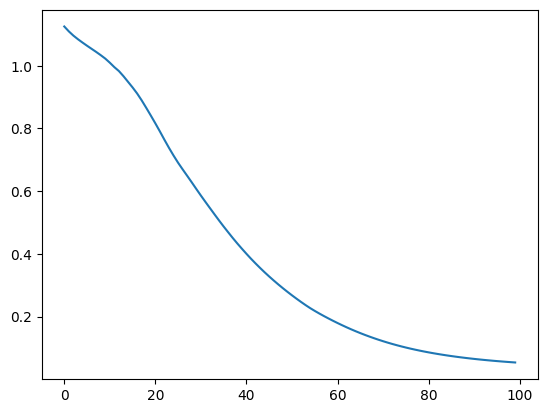

In [61]:
plt.plot(range(epochs), losses)
